<a href="https://colab.research.google.com/github/niuhaoyu16/PythonforBeginners/blob/master/ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [ ]:
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.904
SVC 0.896
VotingClassifier 0.896


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples = 100, bootstrap = True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators =500,
    bootstrap = True, n_jobs=-1, oob_score=True
)

In [ ]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
bag_clf.oob_score_

0.8986666666666666

In [ ]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.896

In [ ]:
bag_clf.oob_decision_function_

array([[0.40449438, 0.59550562],
       [0.33663366, 0.66336634],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.11242604, 0.88757396],
       [0.38461538, 0.61538462],
       [0.02139037, 0.97860963],
       [0.98429319, 0.01570681],
       [0.97826087, 0.02173913],
       [0.73913043, 0.26086957],
       [0.00537634, 0.99462366],
       [0.8045977 , 0.1954023 ],
       [0.85784314, 0.14215686],
       [0.98360656, 0.01639344],
       [0.04102564, 0.95897436],
       [0.        , 1.        ],
       [0.99497487, 0.00502513],
       [0.94086022, 0.05913978],
       [0.97894737, 0.02105263],
       [0.01714286, 0.98285714],
       [0.37096774, 0.62903226],
       [0.89162562, 0.10837438],
       [1.        , 0.        ],
       [0.94972067, 0.05027933],
       [0.        , 1.        ],
       [0.99497487, 0.00502513],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.63959391, 0.36040609],
       [0.

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
  print(name, score)


sepal length (cm) 0.10971837046318839
sepal width (cm) 0.024520051694112102
petal length (cm) 0.4360268787245228
petal width (cm) 0.4297346991181768


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm = "SAMME.R", learning_rate=0.5
)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
import numpy as np

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y)


In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=52,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
min_error = np.min(errors)

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Validation error')

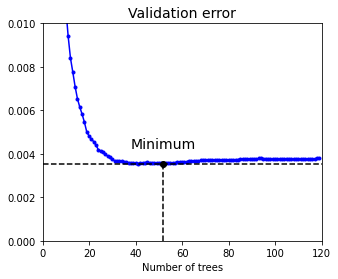

In [ ]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

In [ ]:
min_val_error = float("inf")
error_going_up =0
for n_estimators in range(1,120):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X_train, y_train)
  y_pred = gbrt.predict(X_val)
  val_error = mean_squared_error(y_val, y_pred)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up =0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break 

In [73]:
import pandas as pd
import os
def load_tree_data(tree_path = "/content"):
  csv_path = os.path.join(tree_path, "treefaces.csv")
  return pd.read_csv(csv_path)

In [75]:
tree= load_housing_data()
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEAN    746 non-null    float64
 1   STD     746 non-null    float64
 2   Var     746 non-null    float64
 3   f1      746 non-null    int64  
 4   f2      746 non-null    int64  
 5   f3      746 non-null    int64  
 6   f4      746 non-null    int64  
 7   f5      746 non-null    int64  
 8   Label   746 non-null    int64  
 9   Label2  746 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 58.4 KB


In [76]:
tree["Label"].value_counts()

1    189
2    187
0    186
3    184
Name: Label, dtype: int64

In [77]:
tree.describe()

,MEAN,STD,Var,f1,f2,f3,f4,f5,Label,Label2
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,0.774201,0.095536,0.009536,71.969169,152.844504,280.620643,583.403485,466.128686,1.494638,0.497319
std,0.035757,0.020233,0.004332,51.658952,63.940534,156.185588,291.406834,448.120210,1.115166,0.500328
min,0.647798,0.057957,0.003359,0.000000,28.000000,86.000000,0.000000,0.000000,0.000000,0.000000
25%,0.752596,0.081829,0.006696,39.250000,112.000000,181.000000,342.000000,31.000000,1.000000,0.000000
50%,0.776877,0.092328,0.008525,63.000000,141.000000,231.000000,546.500000,353.000000,1.000000,0.000000
75%,0.800334,0.104436,0.010907,89.000000,185.750000,327.750000,799.500000,832.250000,2.000000,1.000000
max,0.869452,0.166250,0.027639,466.000000,838.000000,1055.000000,1705.000000,1658.000000,3.000000,1.000000


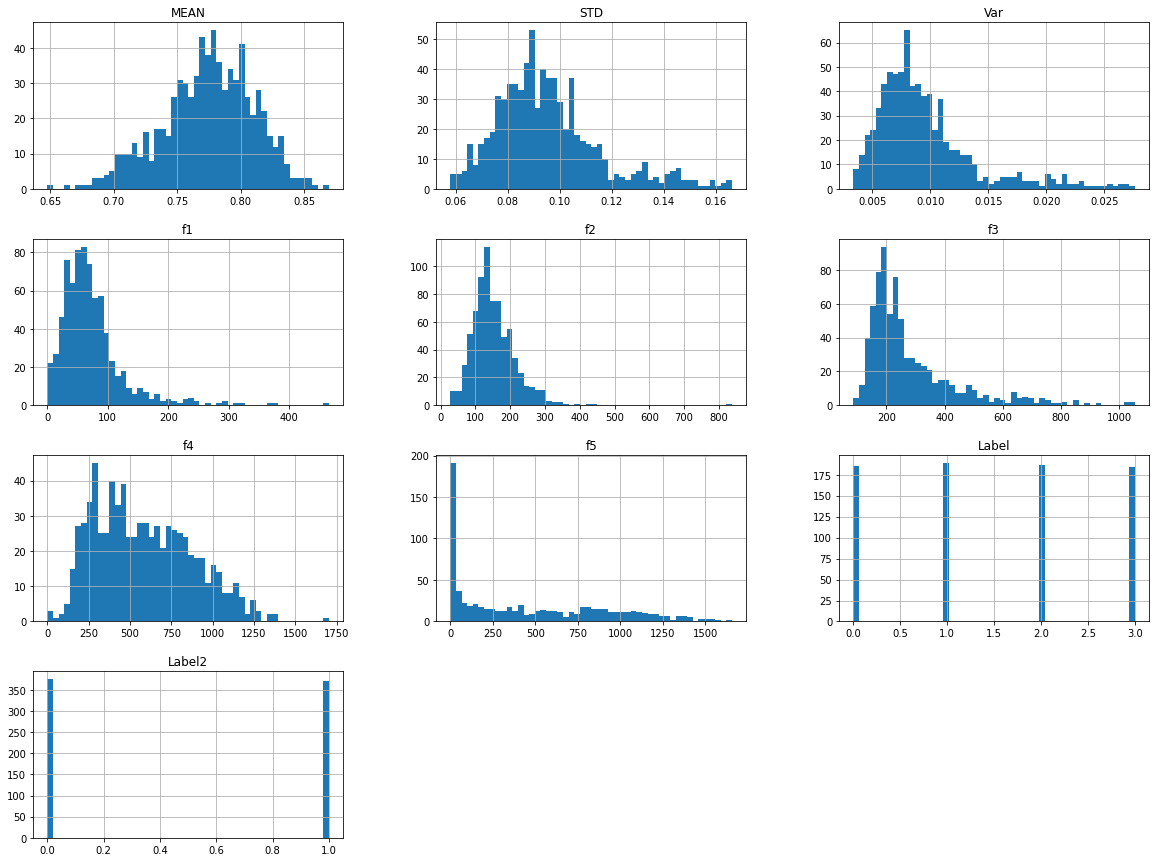

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
tree.hist(bins=50, figsize=(20,15))
plt.show()

In [82]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(tree, tree["Label"]):
  strat_train_set = tree.loc[train_index]
  strat_test_set = tree.loc[test_index]

In [83]:
strat_train_set["Label"].value_counts()/len(strat_train_set)

1    0.253356
2    0.250000
0    0.250000
3    0.246644
Name: Label, dtype: float64

In [85]:
strat_test_set["Label"].value_counts()/len(strat_test_set)

2    0.253333
1    0.253333
3    0.246667
0    0.246667
Name: Label, dtype: float64

In [86]:
strat_test_set

,MEAN,STD,Var,f1,f2,f3,f4,f5,Label,Label2
670,0.759791,0.117216,0.013740,124,118,181,687,283,3,1
656,0.799370,0.090963,0.008274,28,90,173,369,587,1,0
164,0.722427,0.089429,0.007998,73,229,453,599,0,0,0
181,0.756438,0.098910,0.009783,88,185,264,893,130,1,0
377,0.759035,0.077881,0.006065,41,152,303,944,6,1,0
...,...,...,...,...,...,...,...,...,...,...
307,0.792179,0.088024,0.007748,35,171,288,591,775,0,0
302,0.801106,0.097205,0.009449,63,123,192,459,843,0,0
736,0.758198,0.097763,0.009558,62,135,228,727,113,3,1
523,0.689204,0.065347,0.004270,42,256,684,85,0,0,0


In [87]:
tree = strat_train_set.copy()

In [88]:
tree

,MEAN,STD,Var,f1,f2,f3,f4,f5,Label,Label2
198,0.801694,0.162361,0.026361,250,425,254,217,1522,3,1
511,0.709053,0.077384,0.005988,64,264,681,394,0,1,0
280,0.797907,0.099812,0.009962,65,128,181,399,814,2,1
610,0.774310,0.128508,0.016514,166,136,187,417,763,3,1
40,0.757700,0.094584,0.008946,85,178,263,990,72,0,0
...,...,...,...,...,...,...,...,...,...,...
101,0.761982,0.115779,0.013405,108,160,231,569,417,0,0
299,0.786095,0.115153,0.013260,92,130,182,424,710,0,0
641,0.802117,0.104231,0.010864,85,128,187,404,1018,3,1
4,0.672874,0.065519,0.004293,89,394,925,0,0,0,0


In [90]:
corr_matrix = tree.corr()
corr_matrix["Label"].sort_values(ascending=False)

Label     1.000000
Label2    0.893824
f5        0.588421
MEAN      0.541449
Var       0.356667
STD       0.354754
f1        0.187001
f2       -0.120619
f4       -0.191342
f3       -0.444833
Name: Label, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f5c0bbc88>,
      dtype=object)

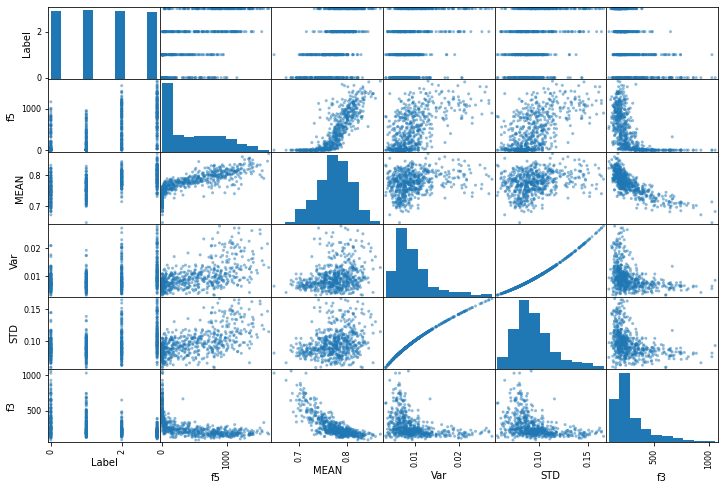

In [92]:
from pandas.plotting import scatter_matrix
attributes = ["Label", "f5", "MEAN",
              "Var", "STD", "f3"]
scatter_matrix(tree[attributes], figsize=(12,8))

In [99]:
tree1 = strat_train_set.drop("Label", axis=1)
tree = tree1.drop("Label2", axis=1)
tree_labels = strat_train_set["Label"].copy()

tree1_test = strat_test_set.drop("Label", axis=1)
tree_test = tree1_test.drop("Label2", axis=1)
tree_test_labels = strat_test_set["Label"].copy()

670    3
656    1
164    0
181    1
377    1
      ..
307    0
302    0
736    3
523    0
595    1
Name: Label, Length: 150, dtype: int64

In [112]:
X_train, X_val, y_train, y_val = tree, tree_test, tree_labels, tree_test_labels

670    3
656    1
164    0
181    1
377    1
      ..
307    0
302    0
736    3
523    0
595    1
Name: Label, Length: 150, dtype: int64

In [113]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [114]:
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
ex_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
svm_clf = LinearSVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [115]:
estimators = [rf_clf, ex_clf, svm_clf, mlp_clf]
for estimator in estimators:
  print("Training the ", estimator)
  estimator.fit(X_train, y_train)

Training the  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Training the  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
    

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training the  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [116]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.4266666666666667, 0.44, 0.30666666666666664, 0.38]

In [117]:
from sklearn.ensemble import VotingClassifier

In [118]:
named_estimators = [
                    ("random_forest_clf", rf_clf),
                    ("extra_trees_clf", ex_clf),
                    ("svm_clf", svm_clf),
                    ("mlp_clf", mlp_clf),

]

In [119]:
voting_clf = VotingClassifier(named_estimators)

In [120]:
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_lea

In [121]:
voting_clf.score(X_val, y_val)

0.4666666666666667

In [122]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.4266666666666667, 0.44, 0.30666666666666664, 0.38]

In [123]:
voting_clf.set_params(svm_clf = None)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_lea

In [124]:
voting_clf.estimators

[('random_forest_clf',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=10,
                         n_jobs=None, oob_score=False, random_state=42, verbose=0,
                         warm_start=False)),
 ('extra_trees_clf',
  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fractio

In [125]:
voting_clf.estimators_

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                 

In [126]:
del voting_clf.estimators_[2]

In [127]:
voting_clf.score(X_val, y_val)

0.4266666666666667

In [128]:
voting_clf.voting = "soft"
voting_clf.score(X_val, y_val)

0.3933333333333333

In [130]:
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

In [131]:
X_val_predictions.shape

(150, 4)

In [132]:
for index, estimator in enumerate(estimators):
  X_val_predictions[:,index] = estimator.predict(X_val)

In [133]:
X_val_predictions

array([[0., 1., 3., 2.],
       [1., 0., 2., 1.],
       [0., 0., 0., 1.],
       [1., 0., 3., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [2., 3., 3., 1.],
       [3., 3., 2., 3.],
       [2., 2., 3., 1.],
       [2., 2., 2., 2.],
       [1., 1., 3., 1.],
       [0., 2., 2., 1.],
       [2., 2., 2., 2.],
       [0., 1., 3., 1.],
       [1., 2., 3., 1.],
       [0., 1., 0., 0.],
       [2., 0., 3., 1.],
       [0., 0., 0., 1.],
       [2., 2., 3., 1.],
       [2., 2., 3., 2.],
       [3., 3., 3., 2.],
       [1., 1., 3., 1.],
       [1., 0., 0., 1.],
       [1., 2., 0., 2.],
       [2., 2., 0., 1.],
       [1., 0., 0., 1.],
       [3., 0., 3., 1.],
       [1., 0., 0., 1.],
       [0., 2., 2., 1.],
       [1., 1., 2., 1.],
       [2., 2., 2., 3.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [2., 2., 3., 1.],
       [3., 3., 2., 1.],
       [0., 0., 0., 0.],
       [1., 1., 3., 1.],
       [1., 2., 3., 2.],
       [3., 3., 2., 1.],
       [1., 1., 3., 1.],


In [134]:
rf_blender = RandomForestClassifier(n_estimators=200, oob_score=True,
                                    random_state=42)
rf_blender.fit(X_val_predictions, y_val)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [135]:
rf_blender.oob_score_

0.38

In [ ]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)


In [ ]:
y_pred = rf_blender.predict(X_test_predictions)


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test, y_pred)


0.9614